In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd



Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.
*italicised text*
You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

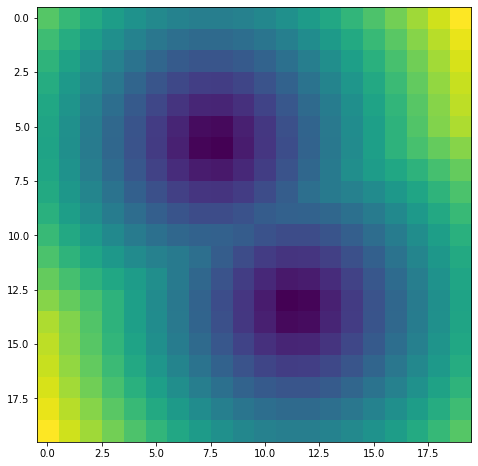


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

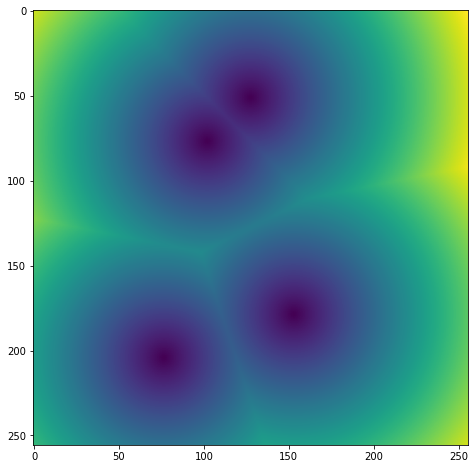


In [3]:
import torch

def min_dist(data, resolution):
    # Create a grid of coordinates
    grid_x, grid_y = torch.meshgrid(torch.linspace(0, 1, resolution), torch.linspace(0, 1, resolution))
    grid = torch.stack([grid_x, grid_y], dim=-1)

    # Convert data points to tensor
    data = torch.tensor(data)

    # Calculate the distance from each pixel to each data point
    distances = torch.cdist(grid.view(-1, 2), data)

    # Find the minimum distance for each pixel
    min_distances, _ = torch.min(distances, dim=1)

    # Reshape the distances back to the grid shape
    min_distances = min_distances.view(resolution, resolution)

    return min_distances

# Example usage
data = [[0.4, 0.3], [0.6, 0.7]]
resolution = 20
result = min_dist(data, resolution)
print(result)


tensor([[0.5000, 0.4703, 0.4449, 0.4245, 0.4099, 0.4017, 0.4003, 0.4058, 0.4179,
         0.4361, 0.4596, 0.4877, 0.5196, 0.5546, 0.5923, 0.6066, 0.6166, 0.6308,
         0.6490, 0.6708],
        [0.4590, 0.4264, 0.3982, 0.3753, 0.3587, 0.3493, 0.3477, 0.3540, 0.3679,
         0.3884, 0.4146, 0.4455, 0.4802, 0.5180, 0.5486, 0.5546, 0.5655, 0.5810,
         0.6007, 0.6242],
        [0.4206, 0.3848, 0.3533, 0.3272, 0.3080, 0.2970, 0.2952, 0.3026, 0.3186,
         0.3421, 0.3716, 0.4058, 0.4436, 0.4842, 0.4961, 0.5028, 0.5147, 0.5317,
         0.5531, 0.5786],
        [0.3855, 0.3461, 0.3107, 0.2807, 0.2581, 0.2449, 0.2426, 0.2516, 0.2707,
         0.2980, 0.3314, 0.3694, 0.4106, 0.4424, 0.4436, 0.4511, 0.4644, 0.4831,
         0.5066, 0.5343],
        [0.3548, 0.3116, 0.2717, 0.2368, 0.2095, 0.1930, 0.1901, 0.2014, 0.2248,
         0.2570, 0.2952, 0.3372, 0.3819, 0.3898, 0.3912, 0.3996, 0.4146, 0.4354,
         0.4614, 0.4916],
        [0.3297, 0.2827, 0.2380, 0.1973, 0.1635, 0.1417, 0.1

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


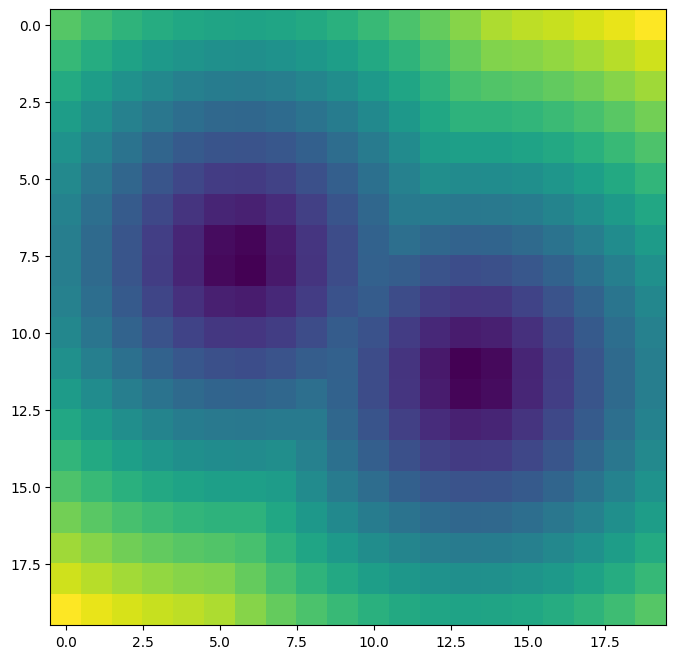

In [4]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

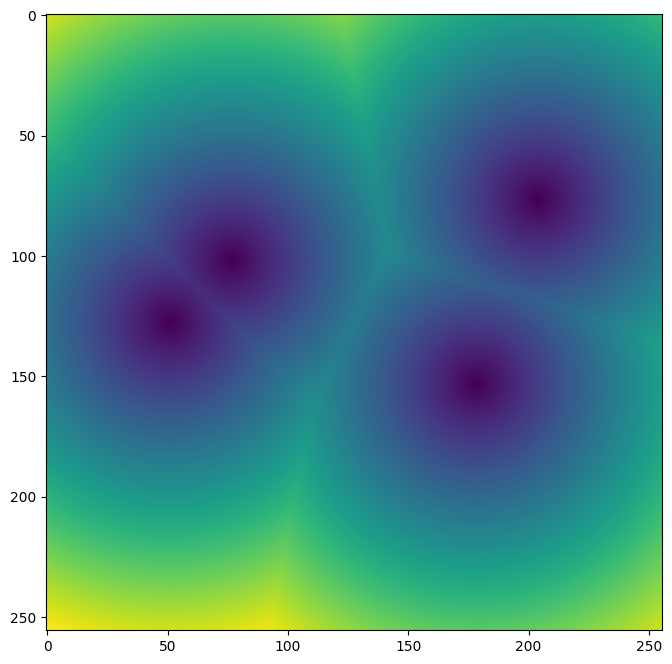

In [5]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

### Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [6]:
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  values = np.random.randint(0, 10, batch_size*num_points).reshape(batch_size, num_points)
  values = np.expand_dims(values, 2)
  points = np.concatenate((coords, values), axis=2)
  return points

In [7]:
import torch

def create_points(batch_size, num_points):
    # Generate random points within the unit square
    points = torch.rand(batch_size, num_points, 2)
    # Add an additional dimension to make it compatible with the original problem specification
    points = torch.cat((points, torch.zeros(batch_size, num_points, 1)), dim=-1)
    return points

def min_dist(points, resolution):
    # Ensure the points are a tensor
    points = torch.tensor(points)

    # Create a grid of coordinates
    grid_x, grid_y = torch.meshgrid(torch.linspace(0, 1, resolution), torch.linspace(0, 1, resolution))
    grid = torch.stack([grid_x, grid_y], dim=-1).unsqueeze(0).repeat(points.shape[0], 1, 1, 1)

    # Calculate the distance from each pixel to each data point
    distances = torch.cdist(grid.view(points.shape[0], -1, 2), points[..., :2])

    # Find the minimum distance for each pixel
    min_distances, _ = torch.min(distances, dim=-1)

    # Reshape the distances back to the grid shape
    min_distances = min_distances.view(points.shape[0], resolution, resolution)

    return min_distances


In [8]:


# Testing the function
batch_size = 3
num_points = 4

# Creating Points
points = create_points(batch_size, num_points)
print(points.shape)  # should print torch.Size([3, 4, 3])
res = 25  # resolution = 25
distances = min_dist(points, res)
print(distances.shape)  # should print torch.Size([3, 25, 25])


torch.Size([3, 4, 3])
torch.Size([3, 25, 25])


<ipython-input-7-a6f57621f231>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  points = torch.tensor(points)


   Input :
  * points: a numpy array of 2D coordinates and point values, normalized to
    be in the range [0,1]. The expected shape is [B, P, 3].
  * res: the resolution of the output tensor.  
   
Returns:  
  * A (res x res) square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points. The return tensor
    shape is [B, res, res].  

While I used the shape [3, P, 3] and res as input and obtained the shape [3, 25, 25] as output which veifies the correctness of the function.


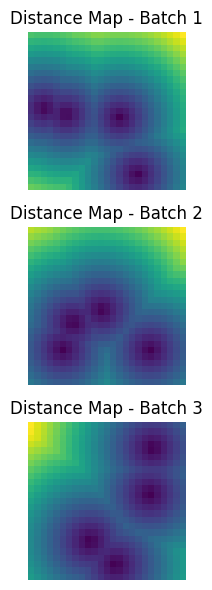

In [9]:
fig, axs = plt.subplots(batch_size, 1, figsize=(6, 6))
for i in range(batch_size):
    axs[i].imshow(distances[i], cmap='viridis')
    axs[i].set_title(f'Distance Map - Batch {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()